In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
from collections import Counter

# Text preprocessing

## simple operations

Now we gone start to work with text. First of all we need to download and simple look at our texts. Lets start from simple preprocessing - lower all text and delete stop words.

In [ ]:
!wget https://raw.githubusercontent.com/MastafaF/multilingual_book_corpus/master/data/harry_potter_ru.txt

In [ ]:
with open('harry_potter_ru.txt', 'r') as f:
  hp = f.read()

In [ ]:
import nltk
nltk.download("stopwords")
nltk.download('punkt')

from nltk.corpus import stopwords
from string import punctuation

In [ ]:
hp

In [ ]:
hp = hp.lower()

Task 1<br>
delete from text all stopwords

### help


In [ ]:
# 1. create list
# 2. split text on words
# 3. check if word in stopwords
# 4. return answer

### Contine working

In [ ]:
stop_words = set(stopwords.words("russian"))
stop_words

In [ ]:
# YOUR CODE HERE
def delete_stop_words(text: str):
  pass

In [ ]:
def delete_stop_words(text: str, stopwords=stop_words):
  result = list()
  for word in text.split():
    if word.lower() in stop_words:
      continue
    result.append(word)
  return ' '.join(result)

In [ ]:
new_hp = delete_stop_words(hp)
new_hp

In [ ]:
assert len(new_hp.split()) == 2639

Now lets calculate all words

In [ ]:
from collections import Counter

Counter(hp.split()).most_common(10), Counter(new_hp.split()).most_common(10)

Task 2<br>
Lets delete punctuation from text

### help

In [ ]:
# 1. create list
# 2. split text on symbols
# 3. check if symbol in punctuation
# 4. return answer

### Continue working

In [ ]:
# YOUR CODE HERE
def delete_puckt(text: str, punctuation=punctuation):
    pass

In [ ]:
def delete_puckt(text: str, punctuation=punctuation):
  result = list()
  for char in text:
    if char in punctuation:
      continue
    result.append(char)
  return ''.join(result)

In [ ]:
new_hp = delete_puckt(new_hp)

In [ ]:
assert len(new_hp) == 18732

## stemming

In [ ]:
from nltk.stem import SnowballStemmer

snowball = SnowballStemmer(language="russian")
snowball.stem("Хороший")

'хорош'

Task 3<br>
Lets do stemming for first 100 words just for practice

### help

In [ ]:
# 1. trim first 100 words
# 2. iterate over selected words and make stemming of each word

### Continue working

In [ ]:
# YOUR CODE HERE

In [ ]:
for word in new_hp.split()[:100]:
  print(snowball.stem(word), end='\t')

## lemmatization

In [ ]:
!wget http://download.cdn.yandex.net/mystem/mystem-3.0-linux3.1-64bit.tar.gz
!tar -xvf mystem-3.0-linux3.1-64bit.tar.gz
!cp mystem /bin

In [ ]:
from pymystem3 import Mystem

In [ ]:
mystem = Mystem('./mystem')
mystem.lemmatize('Хороший')

['хороший', '\n']

In [ ]:
pip install pymorphy2 > /dev/null

In [ ]:
import pymorphy2
morph = pymorphy2.MorphAnalyzer()
morph.parse("Хороший")[0].normal_form

'хороший'

plot words distribution

In [ ]:
from matplotlib import pyplot as plt

from nltk import FreqDist
from nltk.tokenize import word_tokenize

def graph(text: str):
    tokens = word_tokenize(text)
    fd = FreqDist(tokens)
    fd.plot(30,cumulative=False)

In [ ]:
graph(new_hp)

In [ ]:
graph(hp)

## wordcloud

In [ ]:
from wordcloud import WordCloud

In [ ]:
wordcloud = WordCloud().generate(hp)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
wordcloud = WordCloud().generate(new_hp)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## N-grams

In NLP, you can work not only with individual tokens, but also with groups of tokens that go sequentially. They are named - N-grams, where N - number of sequential tokens

In [ ]:
from nltk.util import ngrams

tokenize = word_tokenize(new_hp)
bigrams = ngrams(tokenize, 2)
list(bigrams)

In [ ]:
trigrams = ngrams(tokenize, 3)

Task 4<br>
Write on pure python bigrams generator

### help

In [ ]:
# 1. concatenate each word with next word (zip function can help you)
# 2. yield this concatenation

### Continue working

In [ ]:
# YOUR CODE HERE
def make_bigrams(text: str):
  pass

In [ ]:
def make_bigrams(text: str):
  for bigram in zip(text.split(), text.split()[1:]):
    yield bigram

In [ ]:
assert len(list(make_bigrams(new_hp))) == len(list(ngrams(tokenize, 2)))

# Solving text classification using OHE

## data lookup

In [ ]:
!wget https://raw.githubusercontent.com/susanli2016/NLP-with-Python/master/data/title_conference.csv

In [ ]:
df = pd.read_csv('title_conference.csv')
df['Conference'].nunique()

5

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2507 entries, 0 to 2506
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Title       2507 non-null   object
 1   Conference  2507 non-null   object
dtypes: object(2)
memory usage: 39.3+ KB


In [ ]:
df['Conference'].value_counts()

ISCAS       864
INFOCOM     515
VLDB        423
WWW         379
SIGGRAPH    326
Name: Conference, dtype: int64

Lets plot distribution of classes

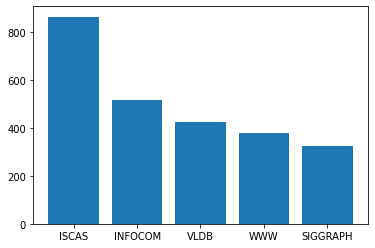

In [ ]:
plt.bar(df['Conference'].value_counts().index, df['Conference'].value_counts());

In [ ]:
df.head()

,Title,Conference
0,Innovation in Database Management: Computer Sc...,VLDB
1,High performance prime field multiplication fo...,ISCAS
2,enchanted scissors: a scissor interface for su...,SIGGRAPH
3,Detection of channel degradation attack by Int...,INFOCOM
4,Pinning a Complex Network through the Betweenn...,ISCAS


Let`s look up at some categories 

In [ ]:
def category_lookup(df, cat):
  return df[df['Conference'] == cat]['Title'].values.tolist()

In [ ]:
category_lookup(df, 'INFOCOM')

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [ ]:
le = LabelEncoder()
le.fit(df['Conference'])
df['Conference'] = le.transform(df['Conference'])
df.head()

,Title,Conference
0,Innovation in Database Management: Computer Sc...,3
1,High performance prime field multiplication fo...,1
2,enchanted scissors: a scissor interface for su...,2
3,Detection of channel degradation attack by Int...,0
4,Pinning a Complex Network through the Betweenn...,1


In [ ]:
texts = df['Title'].values
target = df['Conference'].values

## lets get to work

Split train and test data - set test portion as 0.25

In [ ]:
# YOUR CODE HERE
texts_train, texts_test, y_train, y_test = None

In [ ]:
texts_train, texts_test, y_train, y_test = train_test_split(texts, target,
                                                            test_size=0.25,
                                                            random_state=42)

In [ ]:
from nltk.tokenize import WordPunctTokenizer
tokenizer = WordPunctTokenizer()
preprocess = lambda text: ' '.join(tokenizer.tokenize(text.lower()))

text = 'How to be a grown-up at work: replace "I don\'t want to do that" with "Ok, great!".'
print("before:", text,)
print("after:", preprocess(text))

before: How to be a grown-up at work: replace "I don't want to do that" with "Ok, great!".
after: how to be a grown - up at work : replace " i don ' t want to do that " with " ok , great !".


Task 5<br>
Preprocess texts for train and test

### help

In [ ]:
# 1. you can make it by using functional programming (map(lambda text: ...))
# 2. ... - here you need to tokenize and then again join all tokens

### Continue working

In [ ]:
# YOUR CODE HERE

In [ ]:
texts_train = np.array(list(map(lambda text: ' '.join(tokenizer.tokenize(text.lower())), texts_train)))
texts_test = np.array(list(map(lambda text: ' '.join(tokenizer.tokenize(text.lower())), texts_test)))

In [ ]:
assert texts_train[5] == 'the treescape system : reuse of pre - computed aggregates over irregular olap hierarchies .'
assert texts_test[8] == 'exposing private information by timing web applications .'
assert len(texts_test) == len(y_test)

## Bag of words

One traditional approach to such problem is to use bag of words features:
1. build a vocabulary of frequent words (use train data only)
2. for each training sample, count the number of times a word occurs in it (for each word in vocabulary).
3. consider this count a feature for some classifier

__Note:__ in practice, you can compute such features using sklearn. __Please don't do that in the current assignment, though.__
* `from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer`

Task 6<br>
find up to k most frequent tokens in texts_train, sort them by number of occurences (highest first)

### help

In [ ]:
# 1. count all unique words in train texts
# 2. use Counter to count all occurences
# 3. get top 100 tokens 

### Continue working

In [ ]:
# YOUR CODE HERE

In [ ]:
k = min(10000, len(set(' '.join(texts_train).split())))

counter = Counter(' '.join(texts_train).split())

bow_vocabulary = list(map(lambda x: x[0], counter.most_common()))

print('example features:', bow_vocabulary[::100])

example features: ['.', 'packet', 'cross', 'similarity', 'fluid', 'sram', 'finding', 'supporting', 'next', 'algorithmic', 'smooth', 'width', 'gossip', 'training', 'conditions', 'mm', 'special', 'elastic', 'rasmalai', 'cmut', 'rise', 'archives', 'tweets', 'multiview', 'genomics', 'nyi', 'leashes', 'ambiguity', 'mirrors', 'bicubic', 'dtmos', 'benchmark', 'hexahedral', 'putting', 'historical', 'rigid', 'outside', 'white', 'compiling', 'uncoded', 'advertiser', 'xquery']


Task 7<br>
write function for transforming text into BOW (you can forget about OOV words)

### help

In [ ]:
# 1. create vector length of vocab
# 2. if word in bow_vocab increase by 1 coresponding index

### Continue working

In [ ]:
# YOUR CODE HERE

In [ ]:
def text_to_bow(text):
    """ convert text string to an array of token counts. Use bow_vocabulary. """
    ohe = [0] * len(bow_vocabulary)
    for word in text.split():
      if word in bow_vocabulary:
        i = bow_vocabulary.index(word)
        ohe[i] += 1
    return np.array(ohe, 'float32')

In [ ]:
X_train_bow = np.stack(list(map(text_to_bow, texts_train)))
X_test_bow = np.stack(list(map(text_to_bow, texts_test)))

In [ ]:
k_max = len(set(' '.join(texts_train).split()))
assert X_train_bow.shape == (len(texts_train), min(k, k_max))
assert X_test_bow.shape == (len(texts_test), min(k, k_max))
assert np.all(X_train_bow[5:10].sum(-1) == np.array([len(s.split()) for s in  texts_train[5:10]]))
assert len(bow_vocabulary) <= min(k, k_max)
assert X_train_bow[6, bow_vocabulary.index('.')] == texts_train[6].split().count('.')

### trainig and predicting

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

logit = LogisticRegression(n_jobs=-1, C=1e5, random_state=42)
logit.fit(X_train_bow, y_train)
y_pred = logit.predict(X_test_bow)

print(classification_report(y_test, y_pred,target_names=le.classes_))

              precision    recall  f1-score   support

     INFOCOM       0.79      0.76      0.78       123
       ISCAS       0.87      0.81      0.84       226
    SIGGRAPH       0.63      0.70      0.67        84
        VLDB       0.61      0.64      0.63       105
         WWW       0.63      0.67      0.65        89

    accuracy                           0.74       627
   macro avg       0.71      0.72      0.71       627
weighted avg       0.75      0.74      0.74       627



# Solving text classification using TF-IDF

## Writing TF-IDF from scratch

Not all words are equally useful. One can prioritize rare words and downscale words like "and"/"or" by using __tf-idf features__. This abbreviation stands for __text frequency/inverse document frequence__ and means exactly that:

$$ feature_i = { Count(word_i \in x) \times { log {N \over Count(word_i \in D) + \alpha} }}, $$


where x is a single text, D is your dataset (a collection of texts), N is a total number of documents and $\alpha$ is a smoothing hyperparameter (typically 1). 
And $Count(word_i \in D)$ is the number of documents where $word_i$ appears.

It may also be a good idea to normalize each data sample after computing tf-idf features.

__Your task:__ implement tf-idf features, train a model and evaluate weighted f-score. Compare it with basic BagOfWords model from above.

__Please don't use sklearn/nltk builtin tf-idf vectorizers in your solution :)__ You can still use 'em for debugging though.

Blog post about implementing the TF-IDF features from scratch: https://triton.ml/blog/tf-idf-from-scratch

Task 8<br>
Compute TF

In [ ]:
# YOUR CODE HERE

### help

In [ ]:
# 1. create dict
# 2. count occurence of each word in document
# 3. divide number of occurence by length of doc

### Continue working

In [ ]:
def compute_tf(doc):
  tf_dict = {}
  for word in doc.split():
    if word in tf_dict.keys():
      tf_dict[word] += 1
    else:
      tf_dict[word] = 1
  for word in tf_dict.keys():
    tf_dict[word] /= len(doc)
  return tf_dict

In [ ]:
def compute_count_dict(data):
  count_dict = {}
  for text in data:
    for word in set(text.split()):
      if word in count_dict:
        count_dict[word] += 1
      else:
        count_dict[word] = 1
  return count_dict

Task 9<br>
fill code to compute IDF

### help

In [ ]:
# 1. for each word in count_dict calculate idf (look at the formula)

### Continue working

In [ ]:
from math import log

def compute_idf(data, alpha=1):
  count_dict = compute_count_dict(data)
  idf_dict = {}
  # YOUR CODE HERE
  return idf_dict

In [ ]:
from math import log

def compute_idf(data, alpha=1):
  count_dict = compute_count_dict(data)
  idf_dict = {}
  for word in count_dict:
    idf_dict[word] = log(len(count_dict) / (count_dict[word] + alpha))
  return idf_dict

In [ ]:
idf_dict = compute_idf(texts_train)

In [ ]:
def compute_tf_idf(text, data=texts_train, idf_dict=None):
  if idf_dict is None:
    idf_dict = compute_idf(data)
  tf_dict = compute_tf(text)
  for word in tf_dict.keys():
    if word in word in idf_dict.keys():
      tf_dict[word] *= idf_dict[word]
    else:
      tf_dict[word] = 0
  return tf_dict

Task 10<br>
fill code for filling tf-idf vector

### help

In [ ]:
# 1. if word in idf_dict
# 2. get it index in all_words
# 3. initialize corresponding component in tf_idf vector

### continue working

In [ ]:
all_words = sorted(idf_dict.keys())

def text_to_tfidf(text, idf_dict=idf_dict, all_words=all_words):
  tf_idf = [0] * len(idf_dict)
  tf_idf_dict = compute_tf_idf(text, idf_dict=idf_dict)
  for word in text.split():
    # YOUR CODE HERE
  return np.array(tf_idf, 'float32')

In [ ]:
all_words = sorted(idf_dict.keys())

def text_to_tfidf(text, idf_dict=idf_dict, all_words=all_words):
  tf_idf = [0] * len(idf_dict)
  tf_idf_dict = compute_tf_idf(text, idf_dict=idf_dict)
  for word in text.split():
    if word in idf_dict.keys():
      i = all_words.index(word)
      tf_idf[i] = tf_idf_dict[word]
  return np.array(tf_idf, 'float32')

In [ ]:
X_train_tf = np.stack(list(map(text_to_tfidf, texts_train)))
X_test_tf = np.stack(list(map(text_to_tfidf, texts_test)))

### Evaluate TF-IDF

In [ ]:
logit = LogisticRegression(n_jobs=-1, C=1e5, random_state=42)
logit.fit(X_train_tf, y_train)
y_pred = logit.predict(X_test_tf)

print(classification_report(y_test, y_pred,target_names=le.classes_))

              precision    recall  f1-score   support

     INFOCOM       0.80      0.80      0.80       123
       ISCAS       0.85      0.90      0.87       226
    SIGGRAPH       0.84      0.61      0.70        84
        VLDB       0.67      0.67      0.67       105
         WWW       0.64      0.71      0.67        89

    accuracy                           0.78       627
   macro avg       0.76      0.74      0.74       627
weighted avg       0.78      0.78      0.77       627

